In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification

In [179]:
x,y=make_classification(n_features=2,n_informative=1,n_classes=2,n_clusters_per_class=1,n_samples=100,n_redundant=0,random_state=41,hypercube=False,class_sep=10)

In [180]:
class Custom_logistic_regression:
    def __init__(self,learning_rate=0.1,epoch=1000):
        self.learning_rate=learning_rate
        self.epoch=epoch
        self.coef_=None
        self.intercept_=None

    def fit(self,x,y):
        x=np.insert(x,0,1,axis=1)
        temp=np.ones(x.shape[1])
        y_pred=1/(1+np.exp(np.dot(x,temp)))
        for i in range(self.epoch):
            temp+=(self.learning_rate/x.shape[0])*(np.dot((y-y_pred),x))
        self.coef_=temp[1:]
        self.intercept_=temp[0]

    def predict(self,x):
        return np.dot(x,self.coef_)+self.intercept_

<Axes: >

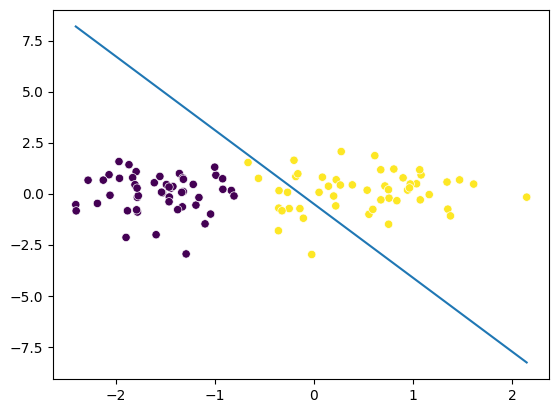

In [182]:
r=Custom_logistic_regression()
r.fit(x,y)
sns.scatterplot(x=x[:,0],y=x[:,1],c=y)
x1=np.linspace(np.min(x[:,0]),np.max(x[:,0]),100)
y1= -(r.coef_[0] / r.coef_[1]) * x1 - (r.intercept_ / r.coef_[1])
sns.lineplot(x=x1,y=y1)

In [183]:
from sklearn.linear_model import LogisticRegression

<Axes: >

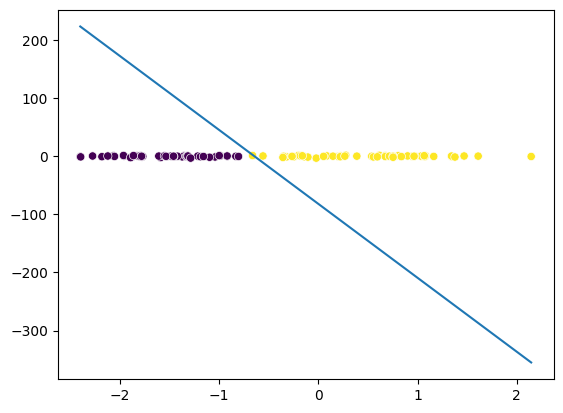

In [186]:
regressor=LogisticRegression()
regressor.fit(x,y)
sns.scatterplot(x=x[:,0],y=x[:,1],c=y)
x1=np.linspace(np.min(x[:,0]),np.max(x[:,0]),100)
y1= -(regressor.coef_[0][0] / regressor.coef_[0][1]) * x1 - (regressor.intercept_ / regressor.coef_[0][1])
sns.lineplot(x=x1,y=y1)